### Q) Aim is to train the linear regression model for predicting the house prices in goregoan city 

In [344]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [418]:
df = pd.read_csv(r"c:\Users\Admin\Downloads\house_cleaned.csv",encoding='Latin')

In [419]:
df.head(1)

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."


In [420]:
df.shape

(964, 20)

In [421]:
df['balcony']=df['balcony'].replace({'3+':3})

<Axes: xlabel='balcony', ylabel='Count'>

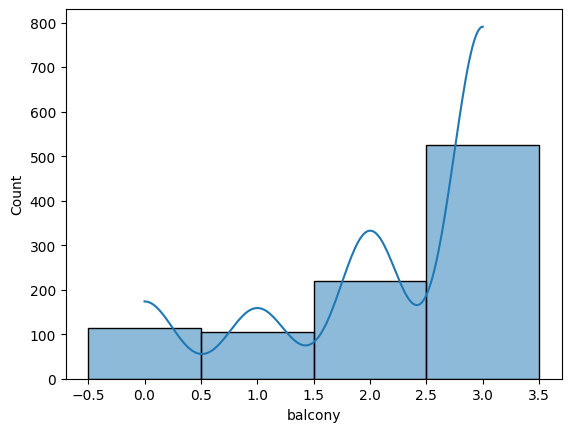

In [422]:
sns.histplot(df['balcony'],kde='true')

In [423]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    386
servant room                                      81
pooja room,study room,servant room,store room     60
others                                            58
pooja room                                        38
pooja room,study room,servant room                33
pooja room,study room,servant room,others         32
store room                                        31
pooja room,servant room                           24
study room                                        19
study room,servant room                           19
servant room,store room                           15
pooja room,study room                             11
pooja room,others                                 11
pooja room,store room                             11
servant room,others                                8
pooja room,store room,study room,servant room      8
servant room,pooja room                            8
pooja room,servant room,store r

In [424]:
additional_dummies = df['additionalRoom'].str.get_dummies(sep=',')
additional_dummies

,not available,others,pooja room,servant room,store room,study room
0,0,0,0,1,0,0
1,0,0,1,1,1,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
959,0,0,1,1,0,1
960,0,0,0,0,0,1
961,0,0,0,1,0,1
962,0,0,0,0,0,1


In [425]:
df = pd.concat([df,additional_dummies],axis=1)
df.head(1)

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,description,furnishDetails,features,rating,not available,others,pooja room,servant room,store room,study room
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3,...,Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",0,0,0,1,0,0


In [426]:
df.drop(['additionalRoom'],axis=1,inplace=True)

In [427]:
#floor drop
df.columns

Index(['property_name', 'property_type', 'society', 'price', 'price_per_sqft',
       'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'address',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations', 'description',
       'furnishDetails', 'features', 'rating', 'not available', 'others',
       'pooja room', 'servant room', 'store room', 'study room'],
      dtype='object')

In [428]:
df.shape

(964, 25)

In [429]:
df['agePossession'].value_counts()  

agePossession
5 to 10 Year Old      250
1 to 5 Year Old       227
10+ Year Old          216
undefined             142
0 to 1 Year Old       109
Within 6 months         7
Jun 2024                2
Dec 2023                2
Under Construction      2
By 2027                 1
Oct 2024                1
By 2024                 1
Dec 2024                1
Within 3 months         1
Oct 2023                1
Jan 2024                1
Name: count, dtype: int64

In [430]:
# To find the correlation between price and age possesion !!
dummies = pd.get_dummies(df['agePossession'], drop_first=True)
df_dummy = pd.concat([df['price'], dummies], axis=1)
df_dummy.corr()['price'].sort_values(ascending=False)



price                 1.000000
1 to 5 Year Old       0.147974
5 to 10 Year Old      0.051905
Within 6 months       0.031519
Dec 2023              0.008361
Oct 2024              0.005874
Under Construction   -0.002834
Oct 2023             -0.009810
By 2027              -0.011280
Dec 2024             -0.011630
Within 3 months      -0.023533
Jan 2024             -0.025493
By 2024              -0.028784
Jun 2024             -0.038252
10+ Year Old         -0.065153
undefined            -0.222459
Name: price, dtype: float64

### we will drop col agePossession 

due to its very mini correlation with the price col 

In [431]:
df.drop(['agePossession'],axis=1,inplace=True)

In [432]:
df.columns

Index(['property_name', 'property_type', 'society', 'price', 'price_per_sqft',
       'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'address',
       'floorNum', 'facing', 'nearbyLocations', 'description',
       'furnishDetails', 'features', 'rating', 'not available', 'others',
       'pooja room', 'servant room', 'store room', 'study room'],
      dtype='object')

In [433]:
df.drop(['floorNum','property_name','property_type','areaWithType','address','description'],axis=1,inplace=True)

In [434]:
df.columns

Index(['society', 'price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom',
       'balcony', 'facing', 'nearbyLocations', 'furnishDetails', 'features',
       'rating', 'not available', 'others', 'pooja room', 'servant room',
       'store room', 'study room'],
      dtype='object')

In [435]:
df.shape

(964, 18)

In [436]:
df.drop(['nearbyLocations'],axis=1,inplace=True)

In [437]:
furnished_dummies=df['furnishDetails'].str.get_dummies(sep=',')
df_transformed = pd.concat([df['price'],furnished_dummies],axis=1)
df_transformed.corr()['price'].sort_values(ascending=False)


price                   1.000000
 '1 Chimney'            0.357562
 '1 Stove'              0.342672
 '1 Exhaust Fan'        0.340626
 '1 Modular Kitchen'    0.331660
                          ...   
['1 Light'             -0.152460
 'No AC'               -0.154601
 'No Geyser'           -0.160775
 '75 Light'                  NaN
['16 Fan'                    NaN
Name: price, Length: 314, dtype: float64

### *we will Drop furnishDetails

In [438]:
df.drop(columns=['furnishDetails'],axis=1,inplace=True)

In [439]:
df['features'].value_counts()

features
['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']                                                                                                                                                                                                                                                                                                                                                                                                                                                                   39
['Water Storage']                                                                                                                                                                                                                                                                                                                                                                

In [440]:
df['features'].isnull().sum()

np.int64(302)

In [441]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer

In [442]:
#fill fetures col 
imputer = SimpleImputer(strategy='constant',fill_value='None')
df['features']=imputer.fit_transform(df[['features']]).ravel()



In [443]:
df['features'].isnull().sum()

np.int64(0)

### features contains lots of messy data in a col , it contains str,'[]',[,dummy names which creats multiple cols of the same name each time , so now we create a func name clean list to clean the list to the python list 

In [444]:
import ast
def clean_list(x):
    try:
        lst = ast.literal_eval(x) # converts str list to actual python list '[]'--->[]
        return [i.strip() for i in lst]
    except: 
        return []


In [445]:
df['feature_clean']=df['features'].apply(clean_list)

In [446]:
df['feature_clean'].value_counts()

feature_clean
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   302
[Feng Shui / Vaastu Compliant, Private Garden / Terrace, Maintenance Staff, Water Storage, Park, Visitor Parking, Waste Disposal, Rain Water Harvesting]                                                                                                                                                                                                                                                                         

In [447]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
features_dummies = pd.DataFrame(mlb.fit_transform(df['feature_clean']),columns=mlb.classes_)
features_dummies.index = df.index

In [448]:
features_dummies

,Airy Rooms,Bank Attached Property,Centrally Air Conditioned,Club house / Community Center,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,High Ceiling Height,Internet/wi-fi connectivity,Low Density Society,...,Recently Renovated,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Spacious Interiors,Swimming Pool,Visitor Parking,Waste Disposal,Water Storage,Water purifier
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,1,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,1,1,0
960,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
961,0,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,1,1,1,0
962,0,0,0,0,1,1,0,1,0,1,...,0,0,1,0,0,0,1,1,1,0


In [449]:
df = pd.concat([df,features_dummies],axis=1)
df.head(1)

,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,facing,features,rating,...,Recently Renovated,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Spacious Interiors,Swimming Pool,Visitor Parking,Waste Disposal,Water Storage,Water purifier
0,bptp visionnaire,5.25,20115.0,2610.0,5,4,3,North-East,"['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",...,0,0,0,0,0,0,1,1,1,0


In [450]:
df.columns

Index(['society', 'price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom',
       'balcony', 'facing', 'features', 'rating', 'not available', 'others',
       'pooja room', 'servant room', 'store room', 'study room',
       'feature_clean', 'Airy Rooms', 'Bank Attached Property',
       'Centrally Air Conditioned', 'Club house / Community Center',
       'False Ceiling Lighting', 'Feng Shui / Vaastu Compliant',
       'Fitness Centre / GYM', 'High Ceiling Height',
       'Internet/wi-fi connectivity', 'Low Density Society',
       'Maintenance Staff', 'Natural Light', 'No open drainage around', 'Park',
       'Piped-gas', 'Private Garden / Terrace', 'Rain Water Harvesting',
       'Recently Renovated', 'Security / Fire Alarm', 'Security Personnel',
       'Separate entry for servant room', 'Spacious Interiors',
       'Swimming Pool', 'Visitor Parking', 'Waste Disposal', 'Water Storage',
       'Water purifier'],
      dtype='object')

In [451]:
df.shape

(964, 44)

In [452]:
df.drop(columns=['features','feature_clean'],axis=1,inplace=True)

### NOW For Ratings 

In [453]:
df['rating'].value_counts()


rating
['Environment5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety5 out of 5']          125
['Environment4 out of 5', 'Lifestyle4 out of 5', 'Connectivity5 out of 5', 'Safety4 out of 5']          112
['Environment4 out of 5', 'Lifestyle4 out of 5', 'Connectivity4 out of 5', 'Safety4 out of 5']          112
['Environment5 out of 5', 'Safety5 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5']           54
['Environment4 out of 5', 'Lifestyle5 out of 5', 'Connectivity5 out of 5', 'Safety4 out of 5']           47
                                                                                                       ... 
['Environment4 out of 5', 'Safety4 out of 5', 'Lifestyle4.5 out of 5', 'Connectivity4 out of 5']          1
['Environment4.5 out of 5', 'Safety4.5 out of 5', 'Lifestyle4 out of 5', 'Connectivity3.5 out of 5']      1
['Environment5 out of 5', 'Safety5 out of 5', 'Lifestyle4.5 out of 5', 'Connectivity5 out of 5']          1
['Environment4.5 out 

In [454]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer

In [455]:
df['rating'].isnull().sum()

np.int64(121)

In [456]:
si = SimpleImputer(strategy='constant',fill_value='none')
df['rating']=si.fit_transform(df[['rating']]).ravel()
df['rating'].isnull().sum()

np.int64(0)

### clean the list first and convert to the python list 

In [457]:
# cleaning of rating col 
import ast
def clean_list(x):
    try:
        lst=ast.literal_eval(x) #convert the string list to python lst
        return [i.strip() for i in lst]
    except:
        return []

    

In [458]:
df['clean_rating']=df['rating'].apply(clean_list)

In [459]:
df['clean_rating'].value_counts()

clean_rating
[Environment5 out of 5, Lifestyle5 out of 5, Connectivity5 out of 5, Safety5 out of 5]          125
[]                                                                                              121
[Environment4 out of 5, Lifestyle4 out of 5, Connectivity5 out of 5, Safety4 out of 5]          112
[Environment4 out of 5, Lifestyle4 out of 5, Connectivity4 out of 5, Safety4 out of 5]          112
[Environment5 out of 5, Safety5 out of 5, Lifestyle5 out of 5, Connectivity5 out of 5]           54
                                                                                               ... 
[Environment4 out of 5, Safety4 out of 5, Lifestyle4.5 out of 5, Connectivity4 out of 5]          1
[Environment4.5 out of 5, Safety4.5 out of 5, Lifestyle4 out of 5, Connectivity3.5 out of 5]      1
[Environment5 out of 5, Safety5 out of 5, Lifestyle4.5 out of 5, Connectivity5 out of 5]          1
[Environment4.5 out of 5, Safety4.5 out of 5, Lifestyle4.5 out of 5, Connectivity5 out 

In [460]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
dummy_ratings = pd.DataFrame(mlb.fit_transform(df['clean_rating']),columns=mlb.classes_)
dummy_ratings.index = df.index
# find corr with price 
corr_price_rt = pd.concat([df['price'],dummy_ratings],axis=1)

In [461]:
corr_price_rt.corr()['price'].sort_values(ascending=False)

price                       1.000000
Environment5 out of 5       0.410136
Safety5 out of 5            0.385256
Lifestyle5 out of 5         0.376100
Connectivity5 out of 5      0.249077
Connectivity3.5 out of 5    0.093230
Safety4.5 out of 5          0.082417
Environment4.5 out of 5     0.010928
Lifestyle4.5 out of 5      -0.006257
Environment3 out of 5      -0.011886
Connectivity3 out of 5     -0.015583
Lifestyle3.5 out of 5      -0.033298
Safety3 out of 5           -0.056013
Safety3.5 out of 5         -0.067795
Environment3.5 out of 5    -0.077361
Lifestyle3 out of 5        -0.077891
Connectivity4.5 out of 5   -0.097923
Connectivity4 out of 5     -0.113074
Lifestyle4 out of 5        -0.184534
Safety4 out of 5           -0.199114
Environment4 out of 5      -0.221518
Name: price, dtype: float64

In [462]:
df = pd.concat([df,dummy_ratings],axis=1)

In [463]:
df.head(1)

,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,facing,rating,not available,...,Lifestyle3 out of 5,Lifestyle3.5 out of 5,Lifestyle4 out of 5,Lifestyle4.5 out of 5,Lifestyle5 out of 5,Safety3 out of 5,Safety3.5 out of 5,Safety4 out of 5,Safety4.5 out of 5,Safety5 out of 5
0,bptp visionnaire,5.25,20115.0,2610.0,5,4,3,North-East,"['Environment5 out of 5', 'Lifestyle4 out of 5...",0,...,0,0,1,0,0,0,0,1,0,0


In [464]:
df.shape

(964, 63)

In [465]:
df.drop(['rating','clean_rating'],axis=1,inplace=True)

In [466]:
df.columns

Index(['society', 'price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom',
       'balcony', 'facing', 'not available', 'others', 'pooja room',
       'servant room', 'store room', 'study room', 'Airy Rooms',
       'Bank Attached Property', 'Centrally Air Conditioned',
       'Club house / Community Center', 'False Ceiling Lighting',
       'Feng Shui / Vaastu Compliant', 'Fitness Centre / GYM',
       'High Ceiling Height', 'Internet/wi-fi connectivity',
       'Low Density Society', 'Maintenance Staff', 'Natural Light',
       'No open drainage around', 'Park', 'Piped-gas',
       'Private Garden / Terrace', 'Rain Water Harvesting',
       'Recently Renovated', 'Security / Fire Alarm', 'Security Personnel',
       'Separate entry for servant room', 'Spacious Interiors',
       'Swimming Pool', 'Visitor Parking', 'Waste Disposal', 'Water Storage',
       'Water purifier', 'Connectivity3 out of 5', 'Connectivity3.5 out of 5',
       'Connectivity4 out of 5', 'Connectivity4.5 out of 5

In [467]:
df.shape

(964, 61)

In [468]:
# chi squre test  ;used to find the correlation between two catagorical col 
# from scipy.stats import chi2_contingency
# table = pd.crosstab(df['price'],df['floorNum'])
# chi2,p,dof,exp=chi2_contingency(table)
# print('chi2',chi2)
# print("p-value",np.round(p,2)) # p < 0.05 → Significant association  | p ≥ 0.05 → No statistical relationship

In [469]:
df.drop(columns=['society'],axis=1,inplace=True)

In [470]:
df.shape

(964, 60)

In [471]:
from sklearn.compose import ColumnTransformer

In [472]:
# drop area col because it does not adds something valuable to our data
df=df.drop(['area'],axis=1)

In [473]:
df.isnull().sum()

price                               19
price_per_sqft                      19
bedRoom                              0
bathroom                             0
balcony                              0
facing                             303
not available                        0
others                               0
pooja room                           0
servant room                         0
store room                           0
study room                           0
Airy Rooms                           0
Bank Attached Property               0
Centrally Air Conditioned            0
Club house / Community Center        0
False Ceiling Lighting               0
Feng Shui / Vaastu Compliant         0
Fitness Centre / GYM                 0
High Ceiling Height                  0
Internet/wi-fi connectivity          0
Low Density Society                  0
Maintenance Staff                    0
Natural Light                        0
No open drainage around              0
Park                     

In [474]:
df.columns

Index(['price', 'price_per_sqft', 'bedRoom', 'bathroom', 'balcony', 'facing',
       'not available', 'others', 'pooja room', 'servant room', 'store room',
       'study room', 'Airy Rooms', 'Bank Attached Property',
       'Centrally Air Conditioned', 'Club house / Community Center',
       'False Ceiling Lighting', 'Feng Shui / Vaastu Compliant',
       'Fitness Centre / GYM', 'High Ceiling Height',
       'Internet/wi-fi connectivity', 'Low Density Society',
       'Maintenance Staff', 'Natural Light', 'No open drainage around', 'Park',
       'Piped-gas', 'Private Garden / Terrace', 'Rain Water Harvesting',
       'Recently Renovated', 'Security / Fire Alarm', 'Security Personnel',
       'Separate entry for servant room', 'Spacious Interiors',
       'Swimming Pool', 'Visitor Parking', 'Waste Disposal', 'Water Storage',
       'Water purifier', 'Connectivity3 out of 5', 'Connectivity3.5 out of 5',
       'Connectivity4 out of 5', 'Connectivity4.5 out of 5',
       'Connectivity5 o

In [475]:
from sklearn.preprocessing import OneHotEncoder

In [476]:
df['facing'].value_counts()

facing
East          178
North-East    158
North         109
West           75
North-West     44
South-East     39
South          34
South-West     24
Name: count, dtype: int64

In [477]:
df['price']=pd.to_numeric(df['price'],errors='coerce')

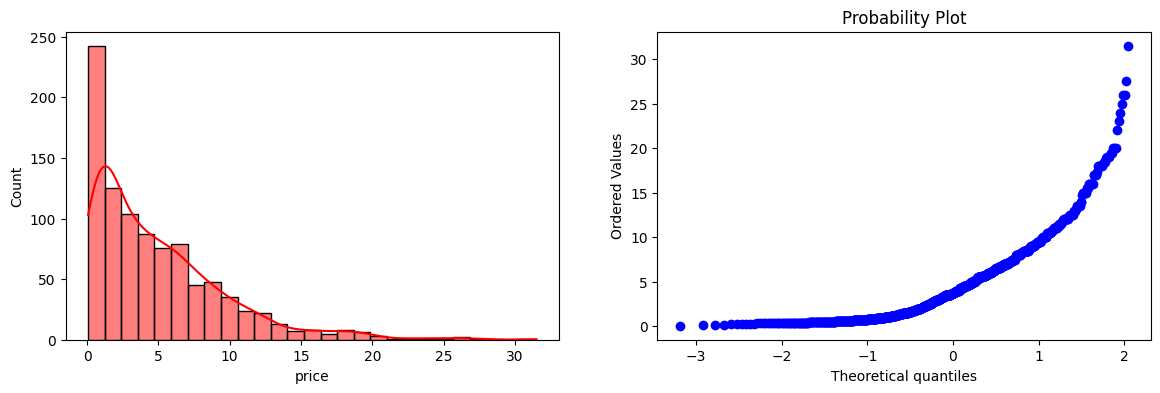

In [478]:
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['price'],kde=True,color='red')
plt.subplot(122)
stats.probplot(df['price'],dist='norm',plot=plt)
plt.show()

In [ ]:
trans = ColumnTransformer([
    ('price',SimpleImputer(strategy='mean'),[0]),
    ('price_per_sqft',SimpleImputer(strategy='mean'),[1]),
    ('facing',OneHotEncoder(),[5]),
    ('price_trans',PowerTransformer(),[0])
    ],remainder='passthrough')

In [480]:
df=trans.fit_transform(df)

In [481]:
df =pd.DataFrame(df,columns=trans.get_feature_names_out())

In [482]:
df.head(4) # here we get double col names as coltransformer does 

,price__price,price_per_sqft__price_per_sqft,facing__facing_East,facing__facing_North,facing__facing_North-East,facing__facing_North-West,facing__facing_South,facing__facing_South-East,facing__facing_South-West,facing__facing_West,...,remainder__Lifestyle3 out of 5,remainder__Lifestyle3.5 out of 5,remainder__Lifestyle4 out of 5,remainder__Lifestyle4.5 out of 5,remainder__Lifestyle5 out of 5,remainder__Safety3 out of 5,remainder__Safety3.5 out of 5,remainder__Safety4 out of 5,remainder__Safety4.5 out of 5,remainder__Safety5 out of 5
0,5.25,20115.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1,5.7,105751.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.1,38251.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,1
3,5.0,43066.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [483]:
# remove prfixes from col name 
df.columns =[col.split("__")[-1] for col in df.columns]

In [484]:
df.head(4)

,price,price_per_sqft,facing_East,facing_North,facing_North-East,facing_North-West,facing_South,facing_South-East,facing_South-West,facing_West,...,Lifestyle3 out of 5,Lifestyle3.5 out of 5,Lifestyle4 out of 5,Lifestyle4.5 out of 5,Lifestyle5 out of 5,Safety3 out of 5,Safety3.5 out of 5,Safety4 out of 5,Safety4.5 out of 5,Safety5 out of 5
0,5.25,20115.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1,5.7,105751.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.1,38251.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,1
3,5.0,43066.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [485]:
df.columns

Index(['price', 'price_per_sqft', 'facing_East', 'facing_North',
       'facing_North-East', 'facing_North-West', 'facing_South',
       'facing_South-East', 'facing_South-West', 'facing_West', 'facing_nan',
       'price', 'bedRoom', 'bathroom', 'balcony', 'not available', 'others',
       'pooja room', 'servant room', 'store room', 'study room', 'Airy Rooms',
       'Bank Attached Property', 'Centrally Air Conditioned',
       'Club house / Community Center', 'False Ceiling Lighting',
       'Feng Shui / Vaastu Compliant', 'Fitness Centre / GYM',
       'High Ceiling Height', 'Internet/wi-fi connectivity',
       'Low Density Society', 'Maintenance Staff', 'Natural Light',
       'No open drainage around', 'Park', 'Piped-gas',
       'Private Garden / Terrace', 'Rain Water Harvesting',
       'Recently Renovated', 'Security / Fire Alarm', 'Security Personnel',
       'Separate entry for servant room', 'Spacious Interiors',
       'Swimming Pool', 'Visitor Parking', 'Waste Disposal', 

In [486]:
df['not available'].value_counts()

not available
0    578
1    386
Name: count, dtype: int64

In [487]:
df['others'].value_counts()

others
0    839
1    125
Name: count, dtype: int64

In [488]:
df.isnull().sum().sum().item()

19

In [493]:
df.columns

Index(['price', 'price_per_sqft', 'facing_East', 'facing_North',
       'facing_North-East', 'facing_North-West', 'facing_South',
       'facing_South-East', 'facing_South-West', 'facing_West', 'facing_nan',
       'price', 'bedRoom', 'bathroom', 'balcony', 'not available', 'others',
       'pooja room', 'servant room', 'store room', 'study room', 'Airy Rooms',
       'Bank Attached Property', 'Centrally Air Conditioned',
       'Club house / Community Center', 'False Ceiling Lighting',
       'Feng Shui / Vaastu Compliant', 'Fitness Centre / GYM',
       'High Ceiling Height', 'Internet/wi-fi connectivity',
       'Low Density Society', 'Maintenance Staff', 'Natural Light',
       'No open drainage around', 'Park', 'Piped-gas',
       'Private Garden / Terrace', 'Rain Water Harvesting',
       'Recently Renovated', 'Security / Fire Alarm', 'Security Personnel',
       'Separate entry for servant room', 'Spacious Interiors',
       'Swimming Pool', 'Visitor Parking', 'Waste Disposal', 

In [490]:
from sklearn.preprocessing import PowerTransformer